In [1]:
#loading data-set
from scipy.io import arff
file_path ='datasets/mnist_784.arff'
data,meta = arff.loadarff(file_path)

In [2]:
#converting arff to a pandas dataframe
import numpy as np
import pandas as pd

mnist_df = pd.DataFrame(data)
mnist_df.shape

(70000, 785)

In [3]:
#splitting dataframe to target 
mnist_target_df = mnist_df.iloc[:,-1]
mnist_target_df

0        b'5'
1        b'0'
2        b'4'
3        b'1'
4        b'9'
         ... 
69995    b'2'
69996    b'3'
69997    b'4'
69998    b'5'
69999    b'6'
Name: class, Length: 70000, dtype: object

In [4]:
#splitting dataframe to pixels 
mnist_pixels_df = mnist_df.iloc[:,:-1]
mnist_pixels_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
print(mnist_pixels_df.shape)


(70000, 784)


In [6]:
#1D and 2D NumPy arrays
X = mnist_pixels_df.values
y = np.array([float(item.decode('utf-8'))for item in mnist_target_df])

In [7]:
#Importing functions to plot the numbers
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [57]:
#Picking a random number for plotting
number_nine= 4
some_digit = X[number_nine]
#reshaping the number to a 28x28 grid
some_digit_image = some_digit.reshape(28,28)

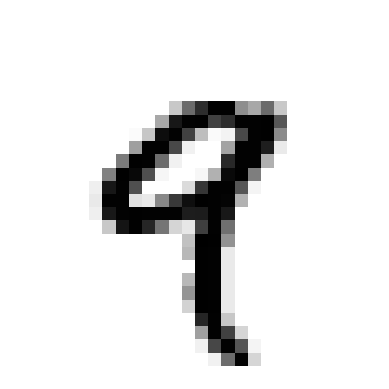

In [58]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
           interpolation="nearest")
plt.axis("off")
plt.show()

In [59]:
target_digit = y[number_nine]
target_digit

9.0

In [11]:
#separando o conjunto de treino e de teste
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000], y[60000:]

In [12]:
#embaralhando o conjunto de treinamento para validação cruzada
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [13]:
#Classificador binário
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
#SGD do scikit-learn
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([False])

In [16]:
#Medindo acurácia com validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    #clonando o classificador a cada iteração 
    clone_clf = clone(sgd_clf)

    #Separando 40000 e 20000 instancias estratificadas para treinamento e teste respect.
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    #ajustando o conjunto de treinamento ao clone atual do classificador
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)

    #quantidade total de acertos é calculada para todo o conjunto de predição e o conjunto alvo
    n_correct = sum(y_pred == y_test_fold)

    #total de acertos sobre total de predições
    print(n_correct / len(y_pred)) 



0.9521
0.92675
0.9572


In [17]:
#utilizando score de validação cruzada para medir o desempenho para 3-folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#acurácia geralmente não é um bom medidor de desempenho para classificadores

array([0.967  , 0.92415, 0.9571 ])

In [18]:
#medindo desempenho com Matriz de confusão
from sklearn.model_selection import cross_val_predict

#separando conjunto de previsão para comparar com os alvos reais 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred.dtype

dtype('bool')

In [19]:
#utilizando os conjuntos de previsão aplicados na matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
#a diagonal principal expressa os valores corretamente classificados
#primeira linha (não 5)
#segunda linha (imagem 5)

array([[52849,  1730],
       [ 1305,  4116]], dtype=int64)

In [20]:
#métrica de precisão e revocação da matriz de confusão:
from sklearn.metrics import precision_score, recall_score

print("precision: ", precision_score(y_train_5, y_train_pred), "recall: ", recall_score(y_train_5, y_train_pred))



precision:  0.7040711597673623 recall:  0.7592695074709463


In [21]:
#pontuiação F1 é a média harmônica da precisão e da revocação com peso muito maior aos valores mais baixos
#apenas obtém melhor pontuação caso a precisão e revocação sejam altas

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7306292713233338

In [22]:
#utilizando o método decision_function() para obter pontuações
#escolhendo um limiar
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-508.76592403])

In [23]:
#Determinando um limiar diferente (SGDClassifier tem por padrão limiar 0)
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
#ao aumentar o limiar a revocação diminuirá

array([False])

In [24]:
#Utilizando o cross_val_predict para escolher o melhor limiar
#Dessa vez utilizar o metodo de função de decisão para obter a pontuação de todas as instâncias
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [25]:
#Pontuação obtida a partir da função de decisão
y_scores

array([ -3594.71102016,   8919.38031791,  -6505.00323226, ...,
       -13372.4866442 , -29557.92010286, -22529.24371082])

In [26]:
#utilizando curva de precisão e revocação para calcular todos os limiares possíveis
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

<function matplotlib.pyplot.show(close=None, block=None)>

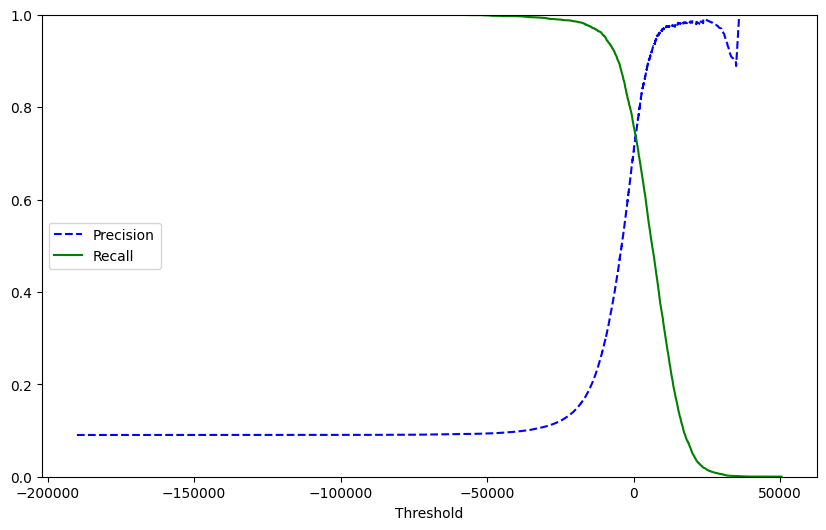

In [27]:
#precisão e revocação como funções de valor do limiar
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
       

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show

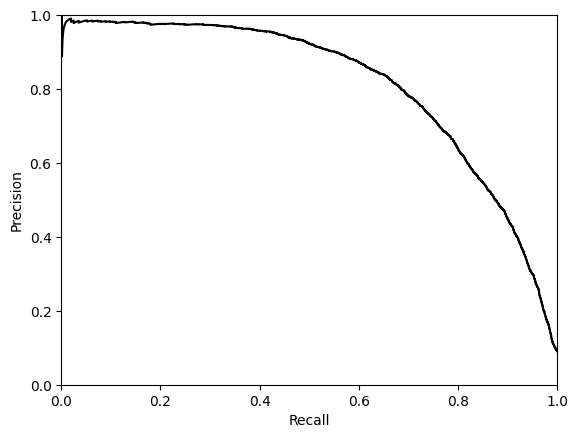

In [28]:
#Visualização da Precisão versus Revocação
def plot_precision_versus_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0, 1])
    plt.xlim([0, 1])

plot_precision_versus_recall(precisions,recalls)

In [29]:
#Escolhendo compensação de precisão/revocação antes da queda acentuada
#almejando 90% de precisão
y_train_pred_90 = (y_scores> 2550)

In [30]:
#score de precisão próximo a 90%
precision_score(y_train_5, y_train_pred_90)

0.8238649326945015

In [31]:
#score de revocação próximo de 70%
recall_score(y_train_5, y_train_pred_90)

0.6661132632355654

In [32]:
#RECEPTOR OPERATIONAL CHARACTERISTICS CURVE (curva ROC)
from sklearn.metrics import roc_curve
#A curva ROC é uma relação de sensibilidade (revocação/TPR) versus 1 - especificidade ou TNR (FPR)  
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


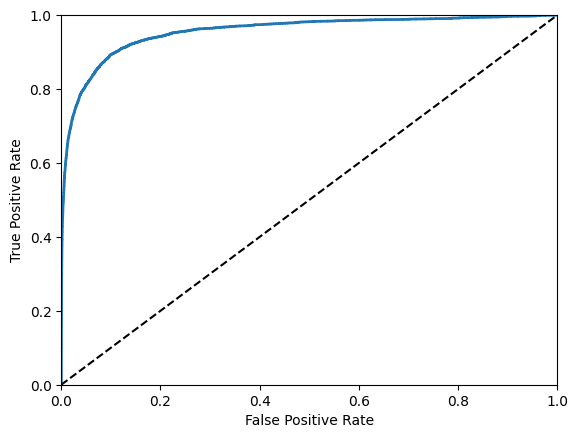

In [33]:
#Plotando a curva

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr, "ROC CURVE")
plt.show()

In [34]:
#Calculando área abaixo da curva (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.955475816548559

In [35]:
#Random Forest Classifier para realizar comparação da curva ROC do SGD classifier
#Classificadores podem ter os métodos decision_function() ou predict_proba()
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                      method="predict_proba")


In [36]:
#Classificador binário (probabilidade de ser 5 ou não)
y_probas_forest

array([[0.94, 0.06],
       [0.25, 0.75],
       [0.82, 0.18],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [37]:
#Obtendo scores por meio das probabilidades positivas
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

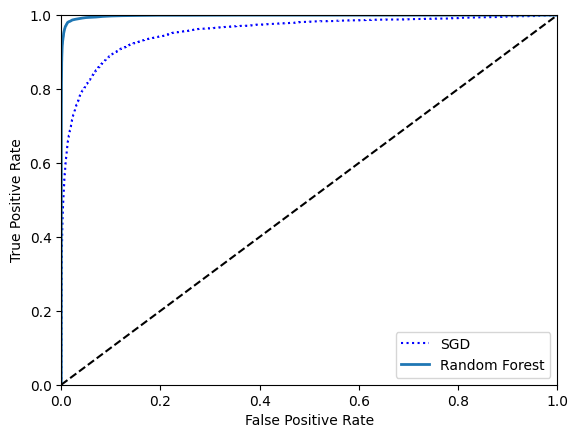

In [38]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="lower right")
plt.show()

In [39]:
#Pontuação ROC AUC do Random Forest Classifier
roc_auc_score(y_train_5, y_scores_forest)

0.998474088991748

In [40]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train_5,cv=3)

In [41]:
#Pontuação da precisão e revocação do Random Forest Classifier
print("precision: ", precision_score(y_train_5, y_train_pred), "recall: ", recall_score(y_train_5, y_train_pred))

precision:  0.9909720764224228 recall:  0.8706880649326693


In [60]:
#Classificação multiclasse utilizando OvO (One versus One) e OvA (One versus All) no SGDClassifier
sgd_clf.fit(X_train, y_train)

#OvA será utilizado automaticamente
#SciKit learn identifica quando será um algoritmo classificação binária será utilizado em uma tarefa de calassificação multiclasses
sgd_clf.predict([some_digit])

array([9.])

In [61]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-32851.63311333, -19116.15252083, -21795.0827457 ,
         -9148.21030156,  -8864.22319563, -11160.41832682,
        -25978.70931497,  -9943.83892761,  -7353.19967901,
            70.67501447]])

In [65]:
#conferindo o maior score:
np.argmax(some_digit_scores)
#A classe que obteve maior pontuação foi a classe 9 (o dígito alvo)

9

In [66]:
#Ao treinar um classificador é armazenado um atributo que contém todas as as classes-alvo:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [67]:
#forçando o SciKit learn a utilizar OvA ou OvR
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([9.])

In [68]:
#para N classes são necessárias N*(N-1)/2 estimadores
#10 * (10-1)/2 = 45
len(ovo_clf.estimators_)

45

In [69]:
#Quando utilizamos o Random Forest não é necessário utilizar OvA ou OvR
#O classificador possui a capacidade de classificar instancias em multi-classes diretamente
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9.])

In [70]:
#Obtendo a probabilidade que o digito tem de pertencer a determinada classe
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.98]])

In [71]:
#Avaliando os classificadores com a validação cruzada
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8666, 0.8515, 0.8785])

In [72]:
#Dimensionando as entradas para obter melhor pontuação
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9002 , 0.89765, 0.89755])

In [75]:
#Utilizando a matriz de confusão
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
confusion_matrix = confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[5595,    0,   15,    7,    8,   30,   30,    5,  232,    1],
       [   0, 6420,   43,   21,    3,   40,    4,    8,  193,   10],
       [  28,   26, 5247,   94,   69,   17,   63,   38,  368,    8],
       [  26,   19,  111, 5214,    2,  195,   25,   44,  428,   67],
       [  13,   13,   45,   11, 5216,   10,   31,   21,  331,  151],
       [  25,   17,   29,  153,   45, 4444,   73,   18,  556,   61],
       [  26,   16,   44,    2,   47,   84, 5543,    6,  150,    0],
       [  20,   12,   54,   18,   48,   11,    4, 5720,  191,  187],
       [  17,   64,   45,   97,    4,  123,   31,    9, 5420,   41],
       [  21,   25,   28,   61,  121,   35,    1,  179,  389, 5089]],
      dtype=int64)

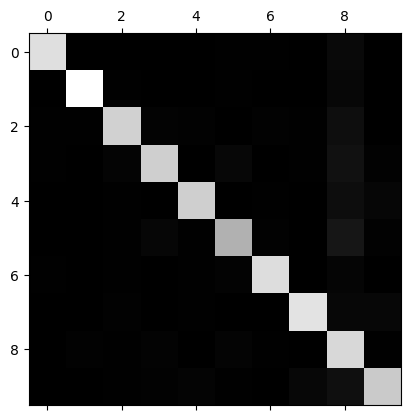

In [78]:
plt.matshow(confusion_matrix, cmap=plt.cm.grey)
plt.show()

In [79]:
#Obtendo taxa de erro

#somatório de todas as predições por linha
row_sums = confusion_matrix.sum(axis=1, keepdims=True)

#normalizando valores
norm_confusion_matrix = confusion_matrix/row_sums

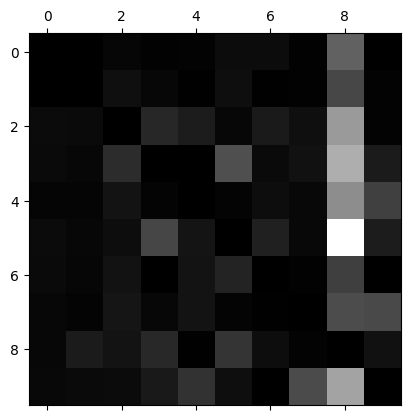

In [81]:
#Preenchendo diagonal principal com 0 para obter apenas os erros na matriz de confusão
np.fill_diagonal(norm_confusion_matrix, 0)
plt.matshow(norm_confusion_matrix, cmap=plt.cm.gray)
plt.show()